# Skewness and Kurtosis

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import sys
from pathlib import Path

from IPython.display import display

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
else:
    raise ImportError("Root directory not found.")

use_svg_display()

## Central Moments

In modern data analysis we are sometimes interested in high-order moments. Here
we consider two useful quantities: skewness and kurtosis.

```{prf:definition} Central Moments
:label: probability-theory-central-moments

For a random variable $X$ with $P D F f_X(x)$, define the
following central moments as

$$
\begin{aligned}
\text { mean } & =\mathbb{E}[X] \stackrel{\text { def }}{=} \mu, \\
\text { variance } & =\mathbb{E}\left[(X-\mu)^2\right] \stackrel{\text { def }}{=} \sigma^2, \\
\text { skewness } & =\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3\right] \stackrel{\text { def }}{=} \gamma \\
\text { kurtosis } & =\mathbb{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4\right] \stackrel{\text { def }}{=} \kappa, \quad \text { excess kurtosis } \stackrel{\text { def }}{=} \kappa-3 .
\end{aligned}
$$
```

As you can see from the definitions above, skewness is the third central moment,
whereas kurtosis is the fourth central moment. Both skewness and kurtosis can be
regarded as "deviations" from a standard Gaussian - not in terms of mean and
variance but in terms of shape{cite}`chan_2021`.

## Skewness

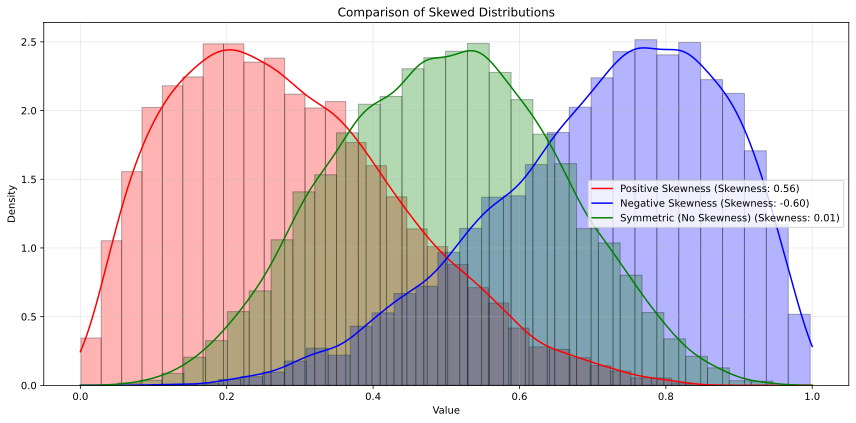

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from typing import List

def generate_skewed_data(size: int, skewness: float) -> np.ndarray:
    """Generate skewed data using a beta distribution."""
    if skewness > 0:
        a, b = 2, 5
    elif skewness < 0:
        a, b = 5, 2
    else:
        a = b = 5
    return np.random.beta(a, b, size)

def plot_distributions(data: List[np.ndarray], labels: List[str]) -> None:
    """Plot the three distributions on the same graph with KDE."""
    plt.figure(figsize=(12, 6))
    colors = ['red', 'blue', 'green']

    for d, label, color in zip(data, labels, colors):
        skewness = stats.skew(d)
        kde = stats.gaussian_kde(d)
        x_range = np.linspace(0, 1, 1000)

        plt.hist(d, bins=30, density=True, alpha=0.3, color=color, edgecolor='black')
        plt.plot(x_range, kde(x_range), color=color, label=f'{label} (Skewness: {skewness:.2f})')

    plt.title('Comparison of Skewed Distributions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def main() -> None:
    np.random.seed(42)  # For reproducibility
    size = 10000

    positive_skew = generate_skewed_data(size, 1)
    negative_skew = generate_skewed_data(size, -1)
    symmetric = generate_skewed_data(size, 0)

    data = [positive_skew, negative_skew, symmetric]
    labels = ['Positive Skewness', 'Negative Skewness', 'Symmetric (No Skewness)']

    plot_distributions(data, labels)

if __name__ == "__main__":
    main()

## Kurtosis

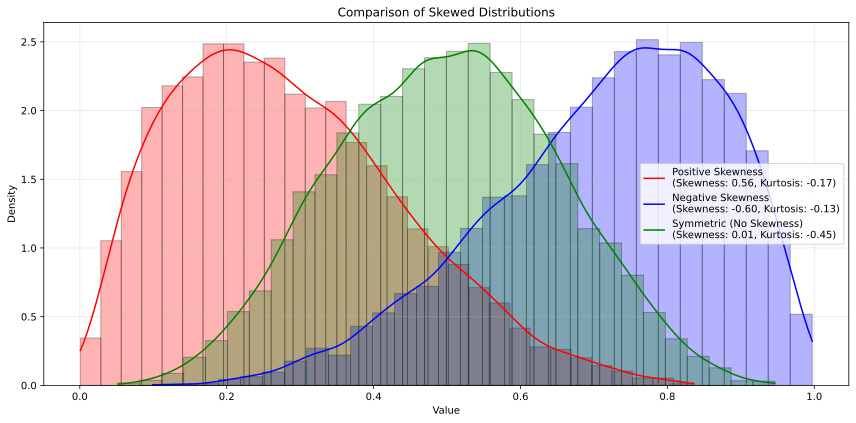

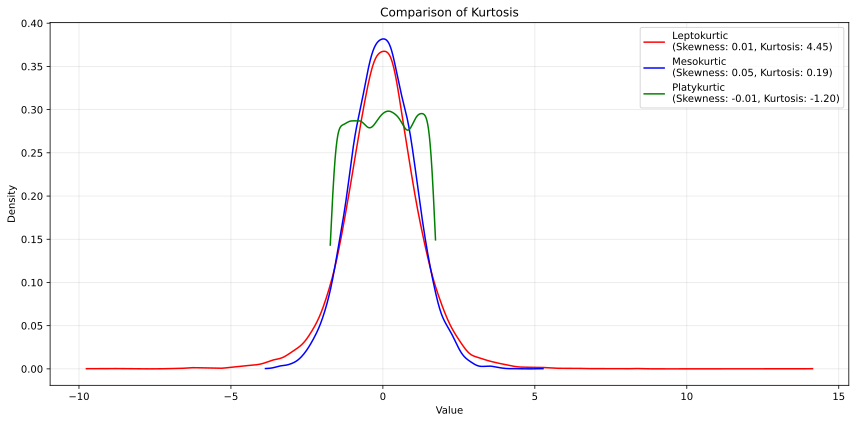

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from typing import List, Tuple

def generate_skewed_data(size: int, skewness: float) -> np.ndarray:
    """Generate skewed data using a beta distribution."""
    if skewness > 0:
        a, b = 2, 5
    elif skewness < 0:
        a, b = 5, 2
    else:
        a = b = 5
    return np.random.beta(a, b, size)

def generate_kurtosis_data(size: int, df: float) -> np.ndarray:
    """Generate data with different kurtosis using Student's t-distribution."""
    return stats.t.rvs(df, size=size)

def plot_distributions(data: List[np.ndarray], labels: List[str], title: str, show_histogram: bool = True) -> None:
    """Plot the distributions on the same graph with KDE."""
    plt.figure(figsize=(12, 6))
    colors = ['red', 'blue', 'green']

    for d, label, color in zip(data, labels, colors):
        skewness = stats.skew(d)
        kurtosis = stats.kurtosis(d)
        kde = stats.gaussian_kde(d)
        x_range = np.linspace(d.min(), d.max(), 1000)

        if show_histogram:
            plt.hist(d, bins=30, density=True, alpha=0.3, color=color, edgecolor='black')
        plt.plot(x_range, kde(x_range), color=color, label=f'{label}\n(Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f})')

    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

def main() -> None:
    np.random.seed(42)  # For reproducibility
    size = 10000

    # Skewness plot
    positive_skew = generate_skewed_data(size, 1)
    negative_skew = generate_skewed_data(size, -1)
    symmetric = generate_skewed_data(size, 0)

    skew_data = [positive_skew, negative_skew, symmetric]
    skew_labels = ['Positive Skewness', 'Negative Skewness', 'Symmetric (No Skewness)']

    plot_distributions(skew_data, skew_labels, 'Comparison of Skewed Distributions')

    # Kurtosis plot
    leptokurtic = generate_kurtosis_data(size, df=5)  # High kurtosis
    mesokurtic = generate_kurtosis_data(size, df=30)  # Normal kurtosis
    platykurtic = np.random.uniform(-np.sqrt(3), np.sqrt(3), size)  # Low kurtosis

    kurtosis_data = [leptokurtic, mesokurtic, platykurtic]
    kurtosis_labels = ['Leptokurtic', 'Mesokurtic', 'Platykurtic']

    plot_distributions(kurtosis_data, kurtosis_labels, 'Comparison of Kurtosis', show_histogram=False)

    plt.show()

if __name__ == "__main__":
    main()

## References and Further Readings

-   Chan, Stanley H. "Chapter 4.6.3 Skewness and kurtosis." In Introduction to
    Probability for Data Science, 216-220. Ann Arbor, Michigan: Michigan
    Publishing Services, 2021.